## Plotting

/tmp/ipykernel_3352700/2131528741.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([""]*8);


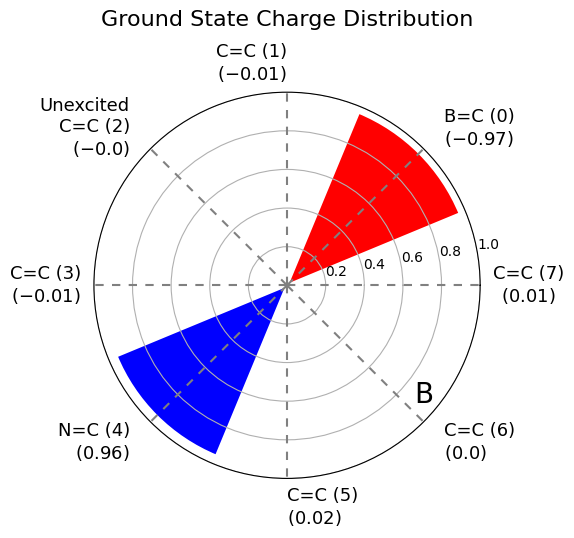

In [8]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd
        
def load_pkl(fn):
    with open(fn,"rb") as file:
        return pickle.load(file)

def plot_charges(charges,labels):
    df = pd.DataFrame()
    df["Value"] = charges
    names = []
    for i,l in enumerate(labels):
        name = l[2:]
        charge = np.round(charges[i],2)
        name = f"{name}\n(${charge}$)"
        names += [name]
    df["Name"] = names
    colors = []
    for c in charges:
        if c > 0:
            colors += ["blue"]
        else:
            colors += ["red"]
    df["Value"] = np.abs(df["Value"])
    
    fig, ax = plt.subplots(figsize=(6,6), subplot_kw={"projection": "polar"})
    
    upperLimit = 1
    lowerLimit = 0
    
    # Let's compute heights: they are a conversion of each item value in those new coordinates
    # In our example, 0 in the dataset will be converted to the lowerLimit (10)
    # The maximum will be converted to the upperLimit (100)
    slope = (1 - lowerLimit) / 1
    heights = slope * df.Value + lowerLimit
    
    # Compute the width of each bar. In total we have 2*Pi = 360°
    width = 2*np.pi / len(df.index)
    
    # Compute the angle each bar is centered on:
    indexes = list(range(1, len(df.index)+1))
    angles = [element * width for element in indexes]
    
    # Draw bars
    bars = ax.bar(
        color=colors,
        x=angles, 
        height=heights, 
        width=width, 
        bottom=lowerLimit,
        linewidth=2, 
        edgecolor="white")
    
    # ax.set_xticks(ANGLES)
    ax.set_xticklabels([""]*8);
    ax.set_ylim(0,1)
    ax.grid(axis="x")
    # ax.spines['polar'].set_visible(False)
    
    ax.vlines(angles, 0, 1, color="grey", ls=(0, (4, 4)), zorder=11)
    ax.set_rlabel_position(10) 
    
    # little space between the bar and the label
    labelPadding = 0
    
    # Add labels
    for bar, angle, height, label in zip(bars,angles, heights, df["Name"]):
    
        # Labels are rotated. Rotation must be specified in degrees :(
        rotation = np.rad2deg(angle)
    
        # Flip some labels upside down
        alignment = ""
        if angle == 2*np.pi:
            # print("hi")
            alignment = "center"
        elif angle == np.pi:
            alignment = "center"
        elif angle >= np.pi/2 and angle < 3*np.pi/2:
            alignment = "right"
            rotation = rotation + 180
        else: 
            alignment = "left"
        rotation=0

        # Finally add the labels
        # print(angle,label)
        fs = 13
        if angle in [np.pi, 2*np.pi]:
            ax.text(
                x=angle, 
                y=1.25,
                s=label, 
                ha=alignment, 
                va='center',
                fontsize=fs,
                rotation=rotation, 
                rotation_mode="anchor")
        else:
            ax.text(
                x=angle, 
                y=1.15,
                s=label, 
                ha=alignment, 
                va='center',
                fontsize=fs,
                rotation=rotation, 
                rotation_mode="anchor")

def calc_charges(results,state="gs"):
    assert(state in ["gs","exs"])
    civecs_lassi = results["civecs_lassi"]
    energies_lassi = results["energies_lassi"]
    class Obj:
        def __init__(self,results):
            self.n_frag = results["n_frag"]
            self.p_frag = results["p_frag"]
            self.ex_frag = results["ex_frag"]
            self.las_charges = results["las_charges"]
            self.nfrags = results["nfrags"]
    geom = Obj(results)
    
    from dsk.las.bandh import make_h
    H = make_h(civecs_lassi,energies_lassi,prnt=False)
    if state == "gs":
        states = [i for i in list(range(H.shape[0])) if i != 1] #exclude es
        H = H[np.ix_(states,states)]
    energies,civecs = np.linalg.eigh(H)

    p = civecs[:,0]**2
    charges = np.zeros(geom.nfrags)
    charges[geom.n_frag] = 1
    charges[geom.p_frag] = -1
    if state == "gs":
        p = civecs[:,0]**2
        charges = geom.las_charges + charges
    elif state == "exs":
        p = civecs[:,1]**2
        charges = np.vstack([geom.las_charges[0],geom.las_charges]) + charges
    charges = (charges * p[:,None]).sum(axis=0)
    labels = []
    for i in range(geom.nfrags):
        if i == geom.n_frag:
            labels += [f"{i} N=C ({i})"]
        elif i == geom.p_frag:
            labels += [f"{i} B=C ({i})"]
        elif i == geom.ex_frag:
            if state == "gs":
                labels += [f"{i} Unexcited\nC=C ({i})"]
            elif state == "exs":
                labels += [f"{i} Excited\n(C=C)* ({i})"]
        else:
            labels += [f"{i} C=C ({i})"]
    return charges,labels

results = load_pkl("npjunc.pkl")
fs = 16
charges,labels = calc_charges(results,state="gs")
plot_charges(charges,labels)
plt.annotate("B",(-1.9*np.pi/8,0.9),fontsize=20)
plt.rcParams['axes.titley'] = 1.15
# plt.rcParams['axes.titlepad'] = -14 
plt.title("Ground State Charge Distribution",fontsize=fs)
plt.tight_layout()
# plt.savefig("figures/unexcited_charge_dist.png",dpi=500)

/tmp/ipykernel_3352700/2131528741.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([""]*8);


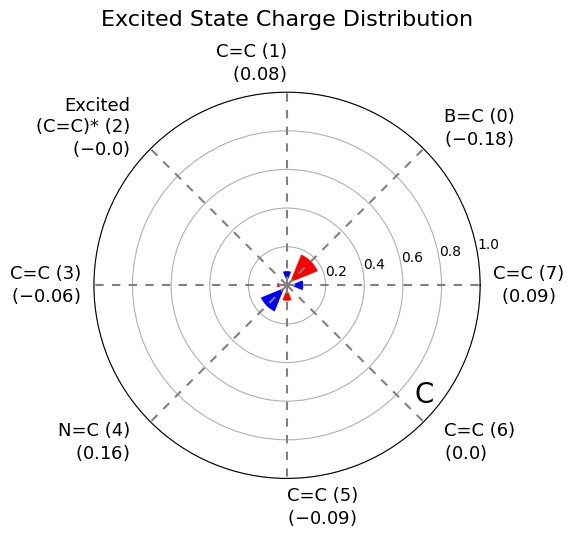

In [10]:
results = load_pkl("npjunc.pkl")
charges,labels = calc_charges(results,state="exs")
plot_charges(charges,labels)
plt.annotate("C",(-1.9*np.pi/8,0.9),fontsize=20)
plt.title("Excited State Charge Distribution",fontsize=fs)
plt.tight_layout()
# plt.savefig("figures/excited_charge_dist.png",dpi=500)

[-614.39 -613.94 -614.1  -614.1  -614.11 -614.11 -614.19 -614.19 -614.32
 -614.32 -614.14 -614.14 -614.08 -614.08 -614.06 -614.06 -613.79 -613.79
 -614.02 -614.02 -614.04 -614.04 -614.16 -614.16 -613.96 -613.96 -613.88
 -613.88 -613.81 -613.81 -613.62 -613.62 -613.86 -613.86 -614.04 -614.04
 -614.1  -614.1  -613.88 -613.88 -613.78 -613.78 -613.69 -613.69 -613.5
 -613.5  -613.67 -613.67 -613.85 -613.85 -614.08 -614.08 -613.81 -613.81
 -613.69 -613.69 -613.59 -613.59 -613.36 -613.36 -613.51 -613.51 -613.63
 -613.63 -613.81 -613.81 -613.76 -613.76 -613.59 -613.59 -613.46 -613.46
 -613.54 -613.54 -613.68 -613.68 -613.77 -613.77 -613.91 -613.91 -614.13
 -614.13 -613.85 -613.85 -613.67 -613.67 -613.66 -613.66 -613.78 -613.78
 -613.86 -613.86 -613.97 -613.97 -614.14 -614.14 -614.03 -614.03 -613.84
 -613.84 -613.84 -613.84 -613.9  -613.9  -613.96 -613.96 -614.05 -614.05
 -614.21 -614.21 -614.04 -614.04 -614.03 -614.03]


<Axes: >

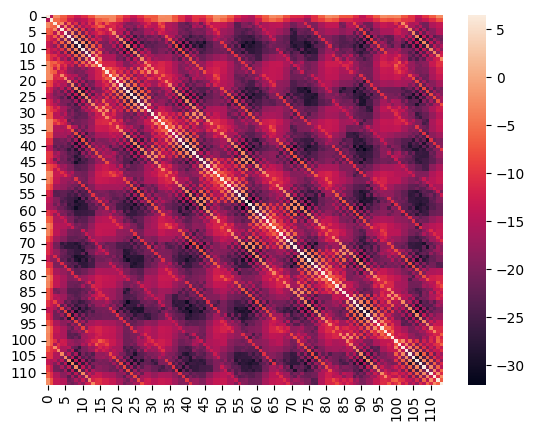

In [13]:
import pickle
import matplotlib.pyplot as plt

def load_pkl(fn):
    with open(fn,"rb") as file:
        return pickle.load(file)

def make_h(civecs_lassi,energies_lassi,plot=False,prnt=True):
    H = np.zeros((civecs_lassi.shape[0],civecs_lassi.shape[0]))
    for i in range(civecs_lassi.shape[1]):
        H += np.outer(civecs_lassi[:,i],civecs_lassi[:,i]) * energies_lassi[i]
    if prnt:
        print(np.round(np.diag(H),2))
    if plot:
        sns.heatmap(H - np.diag(np.diag(H)))
    return H
    
import numpy as np
results = load_pkl("npjunc.pkl")
H = make_h(results["civecs_lassi"],results["energies_lassi"],plot=False)
for i in range(H.shape[0]):
    H[i][np.where(H[i] != 0)] = np.log(np.abs(H[i][np.where(H[i] != 0)]))
    H[i][np.where(H[i] == 0)] = -20
import seaborn as sns
sns.heatmap(H)
# plt.savefig("figures/npjunc_hamiltonian_log.png",dpi=500)

[-614.39 -613.94 -614.1  -614.1  -614.11 -614.11 -614.19 -614.19 -614.32
 -614.32 -614.14 -614.14 -614.08 -614.08 -614.06 -614.06 -613.79 -613.79
 -614.02 -614.02 -614.04 -614.04 -614.16 -614.16 -613.96 -613.96 -613.88
 -613.88 -613.81 -613.81 -613.62 -613.62 -613.86 -613.86 -614.04 -614.04
 -614.1  -614.1  -613.88 -613.88 -613.78 -613.78 -613.69 -613.69 -613.5
 -613.5  -613.67 -613.67 -613.85 -613.85 -614.08 -614.08 -613.81 -613.81
 -613.69 -613.69 -613.59 -613.59 -613.36 -613.36 -613.51 -613.51 -613.63
 -613.63 -613.81 -613.81 -613.76 -613.76 -613.59 -613.59 -613.46 -613.46
 -613.54 -613.54 -613.68 -613.68 -613.77 -613.77 -613.91 -613.91 -614.13
 -614.13 -613.85 -613.85 -613.67 -613.67 -613.66 -613.66 -613.78 -613.78
 -613.86 -613.86 -613.97 -613.97 -614.14 -614.14 -614.03 -614.03 -613.84
 -613.84 -613.84 -613.84 -613.9  -613.9  -613.96 -613.96 -614.05 -614.05
 -614.21 -614.21 -614.04 -614.04 -614.03 -614.03]


<Axes: >

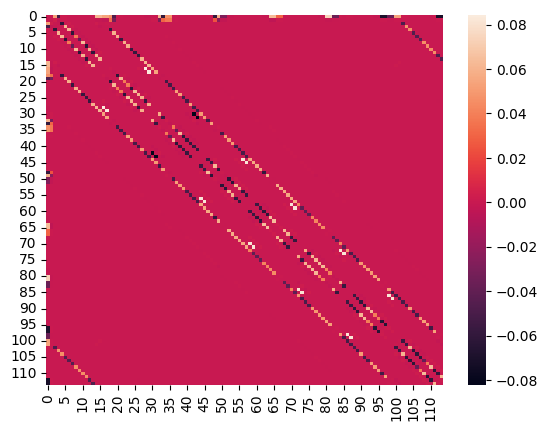

In [16]:
import pickle

def load_pkl(fn):
    with open(fn,"rb") as file:
        return pickle.load(file)
        
import numpy as np
results = load_pkl("npjunc.pkl")
H = make_h(results["civecs_lassi"],results["energies_lassi"],plot=False)
H = H - np.diag(np.diag(H))
import seaborn as sns
sns.heatmap(H)
# plt.savefig("figures/npjunc_hamiltonian_nodiag.png",dpi=500)